In [1]:
#libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.utils import to_categorical

In [3]:
#load dataset
(train_images , train_labels), (test_images , test_labels) = datasets.mnist.load_data()

In [5]:
#normalize pixel values
train_images = train_images/255.0
test_images = test_images/255.0

In [7]:
#reshape the images
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

In [9]:
#labels to one hot encoded format
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
#build model
model=models.Sequential()

In [13]:
#first convolutional layer
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))

C:\Users\HP\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [15]:
# Second Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [17]:
# Third Convolutional Layer
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [19]:
# Flatten the 3D output to 1D and add a Dense layer
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

In [21]:
# Output layer with 10 neurons (for 10 digit classes)
model.add(layers.Dense(10, activation='softmax'))

In [23]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [25]:
# Train the model
model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 30s 27ms/step - accuracy: 0.8719 - loss: 0.4201 - val_accuracy: 0.9837 - val_loss: 0.0516
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9818 - loss: 0.0557 - val_accuracy: 0.9812 - val_loss: 0.0617
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 25s 27ms/step - accuracy: 0.9879 - loss: 0.0392 - val_accuracy: 0.9867 - val_loss: 0.0402
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 26s 28ms/step - accuracy: 0.9909 - loss: 0.0280 - val_accuracy: 0.9894 - val_loss: 0.0329
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 27s 28ms/step - accuracy: 0.9931 - loss: 0.0221 - val_accuracy: 0.9890 - val_loss: 0.0327


In [27]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc * 100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9859 - loss: 0.0431
Test accuracy: 98.90%


In [29]:
# Make predictions on test images
predictions = model.predict(test_images)
print(f"Prediction for first test image: {np.argmax(predictions[4])}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step
Prediction for first test image: 4


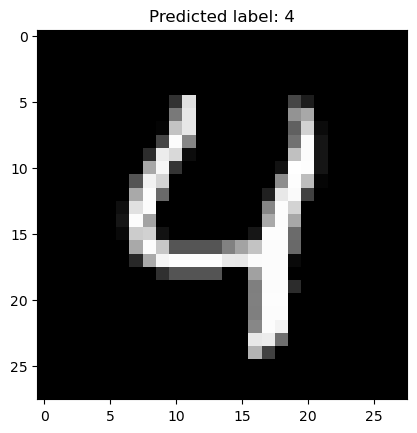

In [31]:
import matplotlib.pyplot as plt
plt.imshow(test_images[4].reshape(28,28),cmap='gray')
plt.title(f"Predicted label: {predictions[4].argmax()}")
plt.show()